In [1]:
import numpy as np 
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

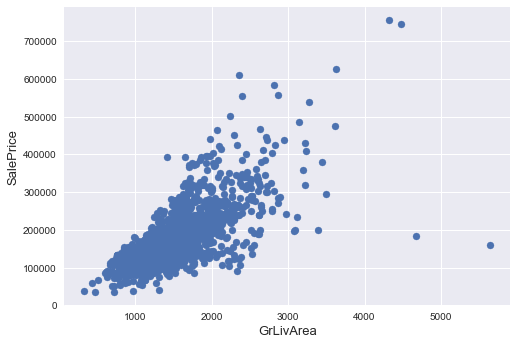

In [6]:
# outliners
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

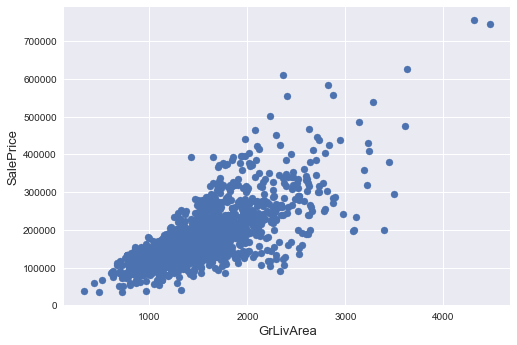

In [7]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
# extremely large areas for very low prices
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



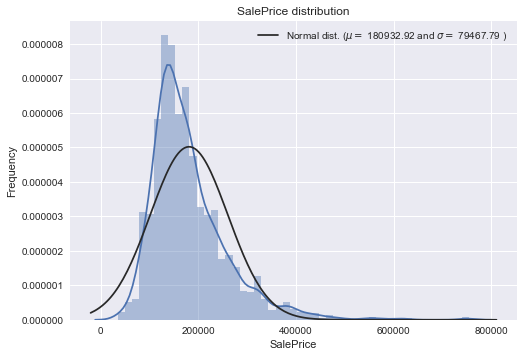

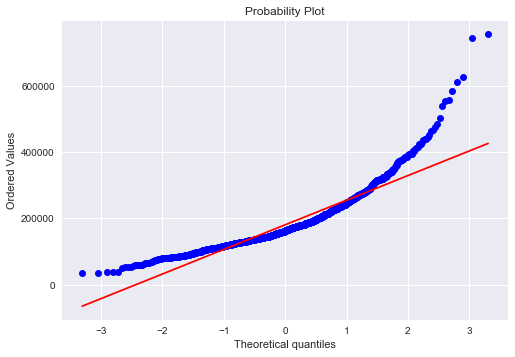

In [8]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



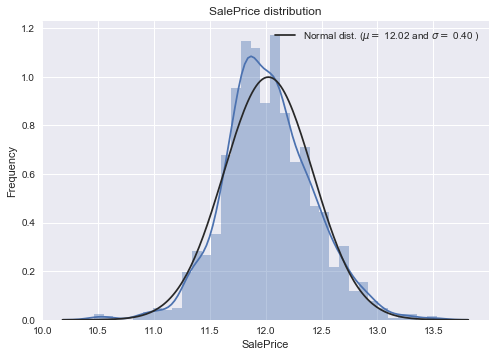

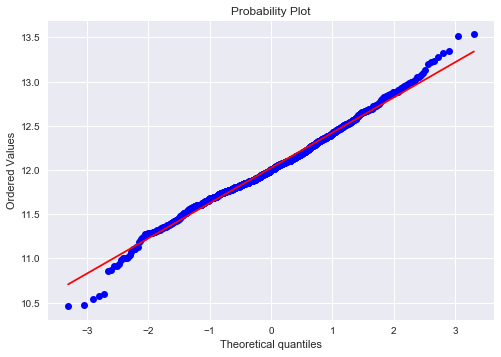

In [9]:
# The target variable is right skewed
#Log-transformation of the target variable
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [10]:
# feature engineering
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [11]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


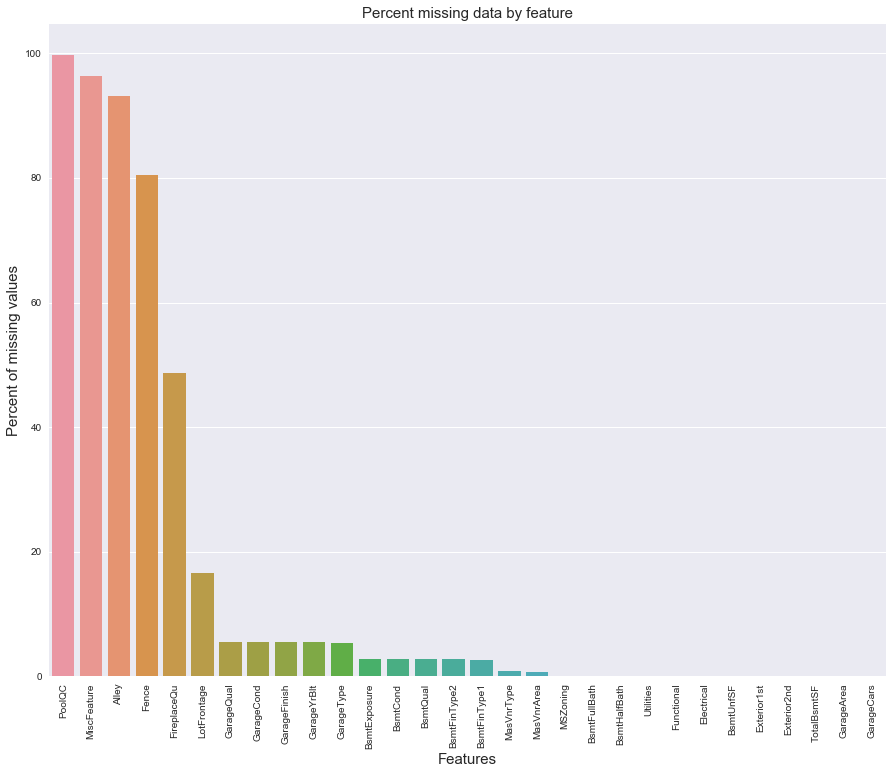

In [12]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

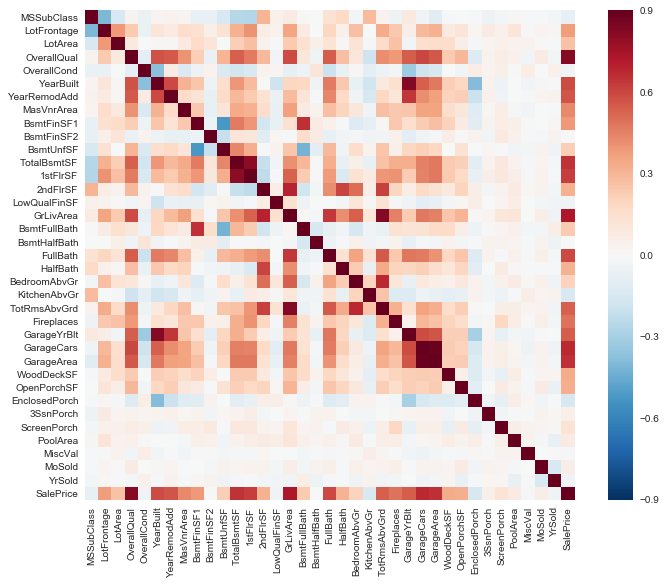

In [13]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [12]:
# imputation
# no features imputate none
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [13]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [14]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [15]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [16]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [17]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [18]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [19]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
# histogram
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [20]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, 
# this feature won't help in predictive modelling. We can then safely remove it.
# histogram
all_data = all_data.drop(['Utilities'], axis=1)

In [21]:
#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [22]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [23]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) 
#for the missing value in KitchenQual
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [24]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. 
#We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [25]:
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [26]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [27]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [28]:
#Transforming some numerical variables that are really categorical
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [29]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [32]:
all_data[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,10,4,2,4
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,5,7,1,7
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,10,4,2,11
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,11,4,0,4
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,10,4,2,3


In [30]:
#Adding one more important feature
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [31]:
# schewed feature
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


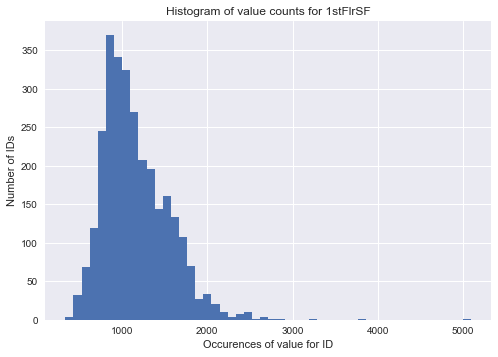

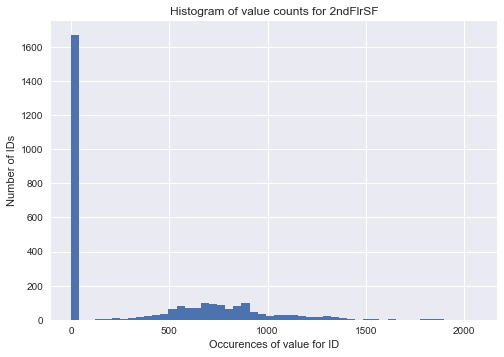

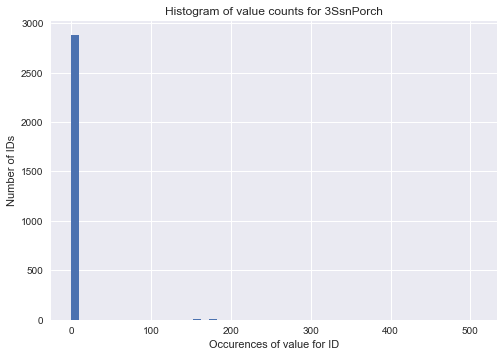

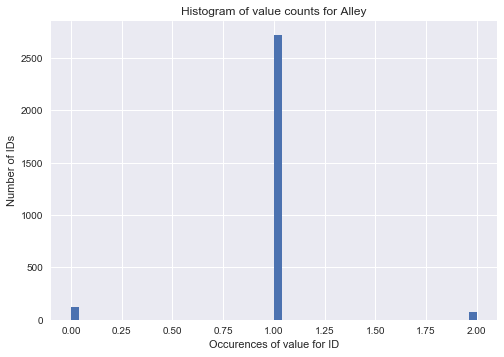

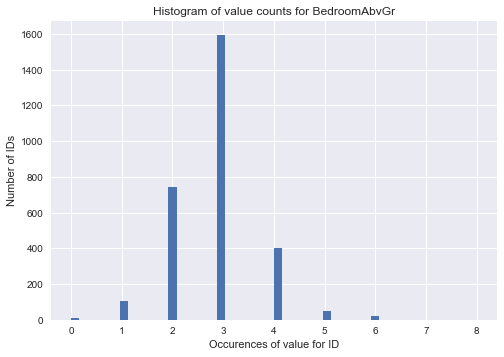

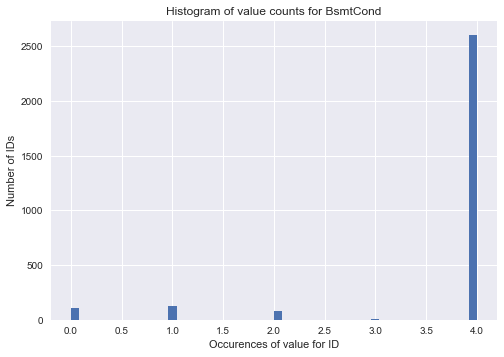

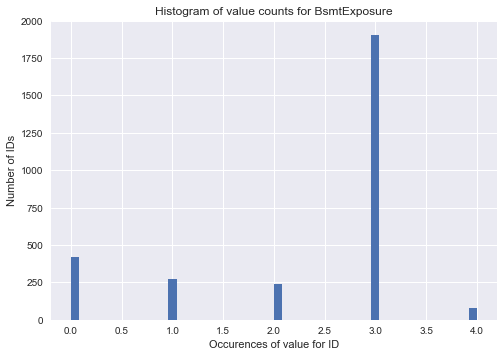

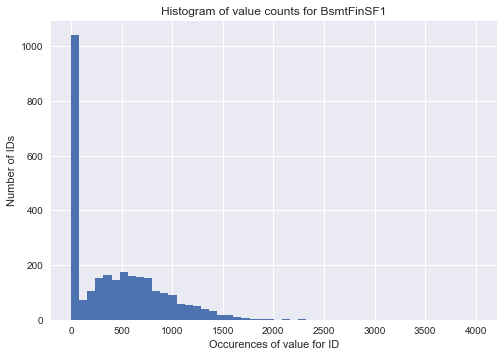

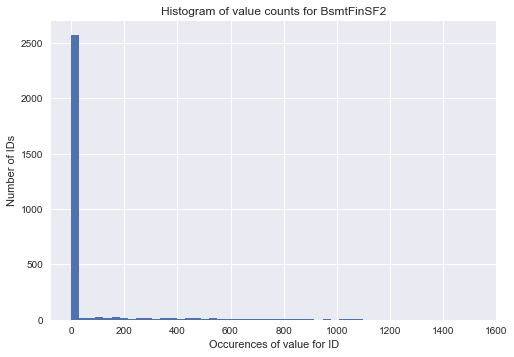

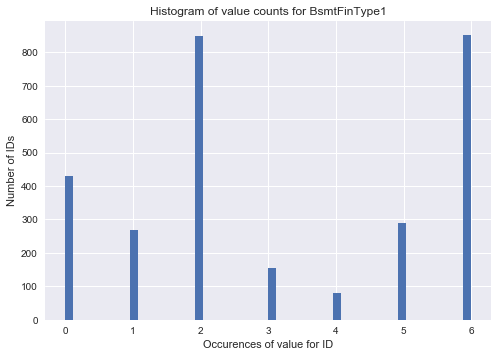

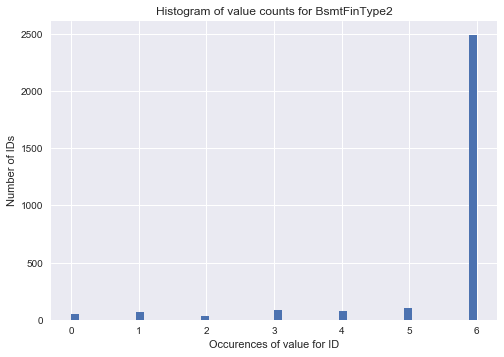

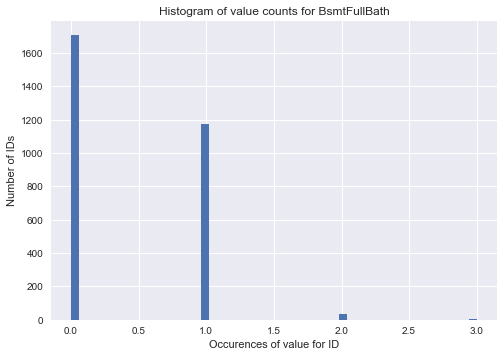

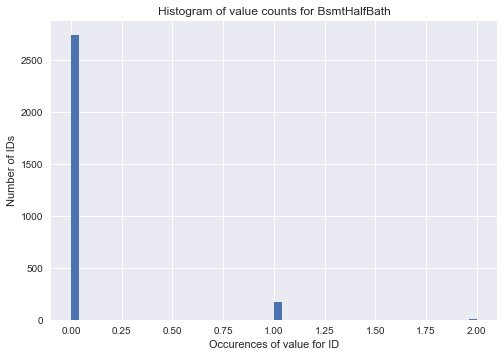

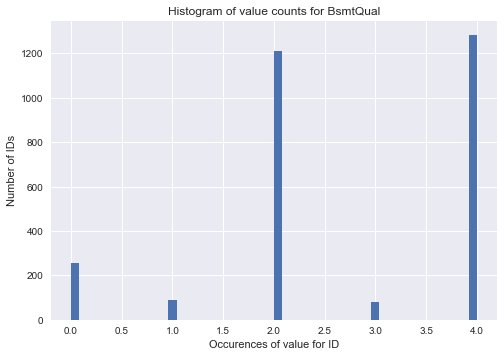

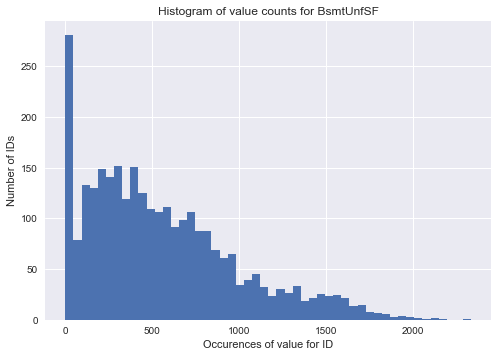

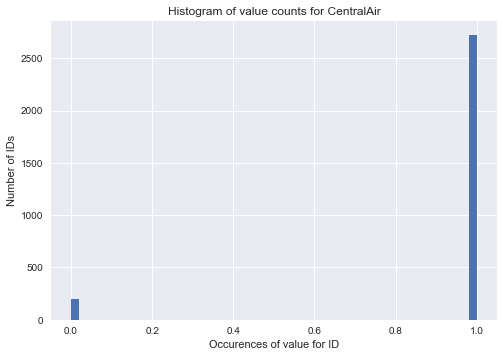

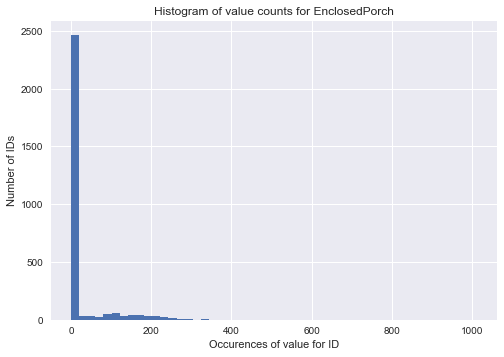

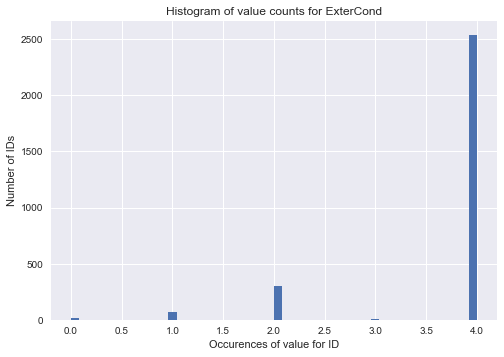

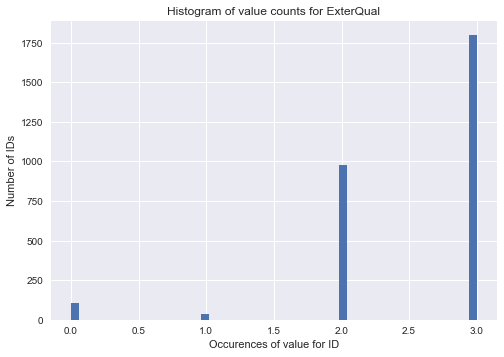

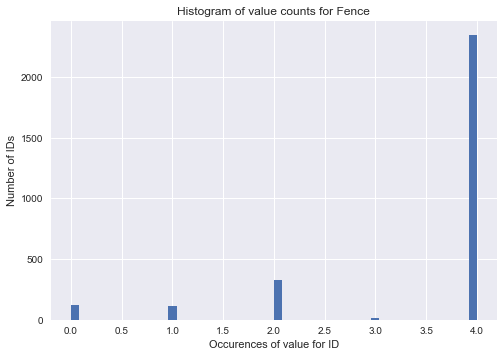

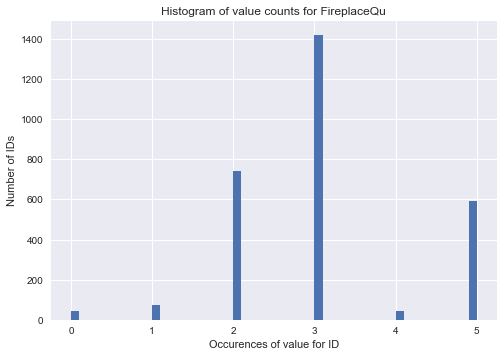

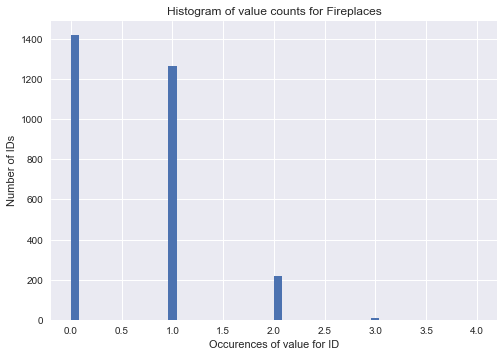

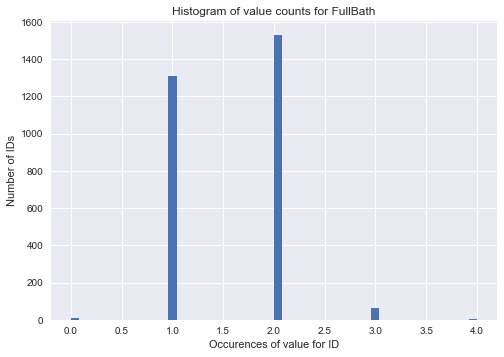

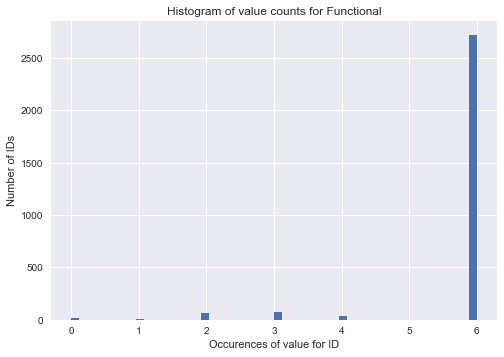

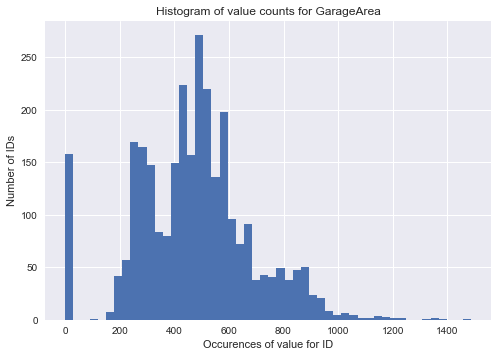

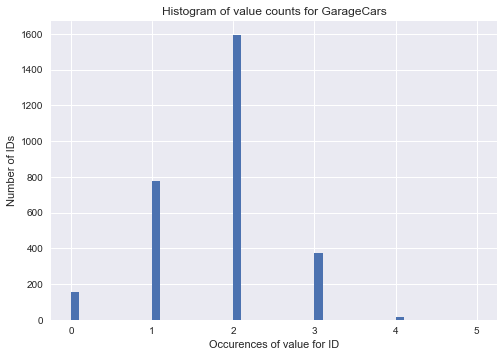

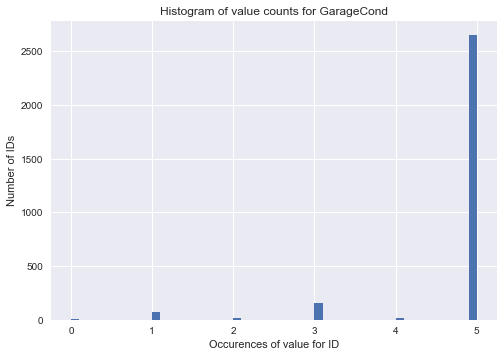

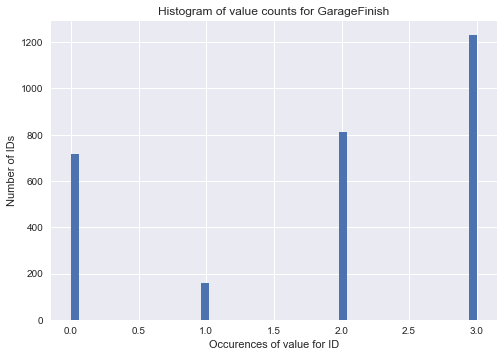

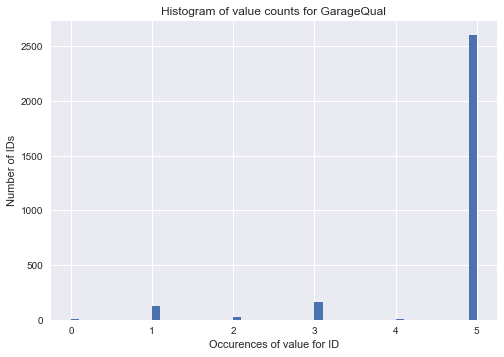

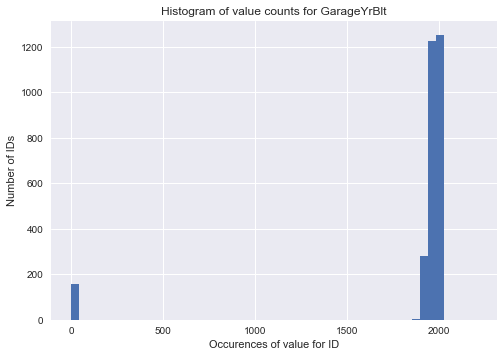

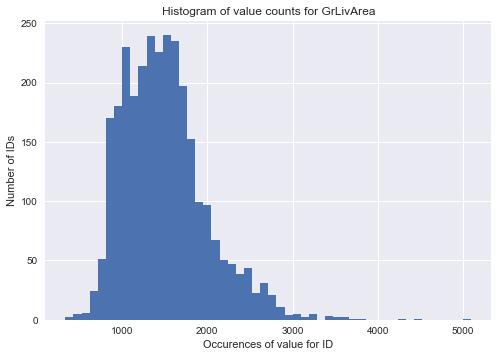

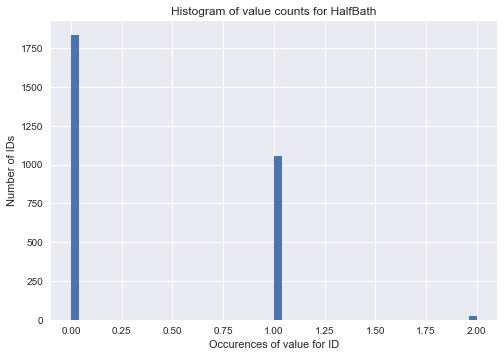

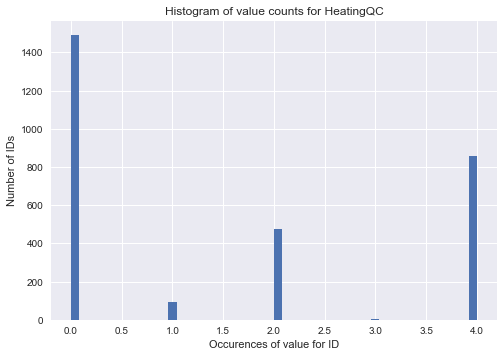

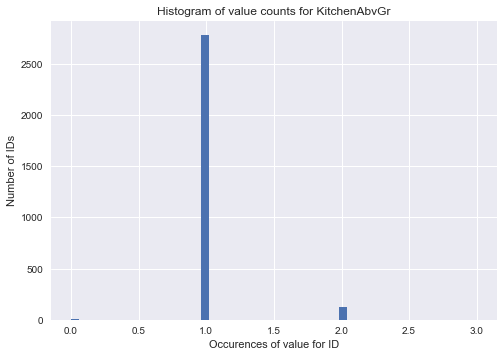

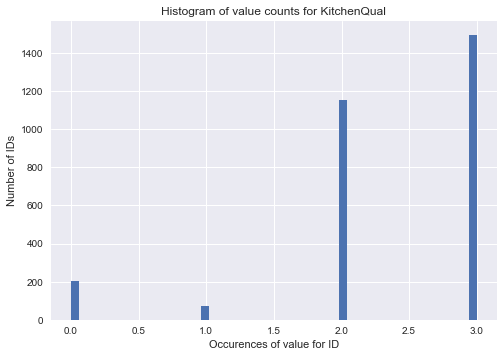

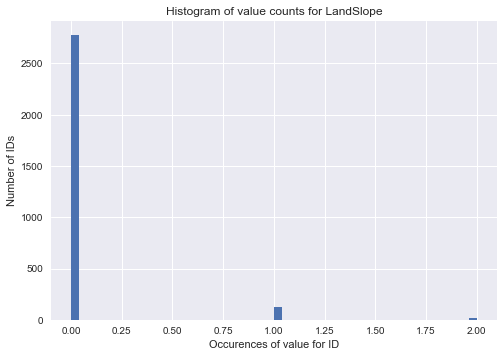

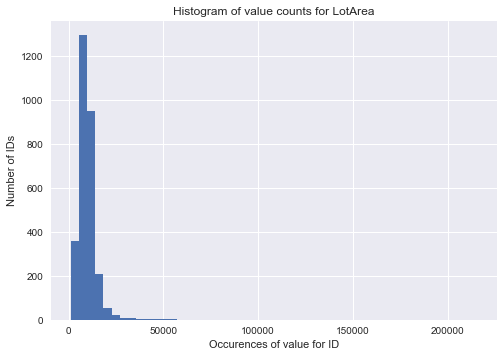

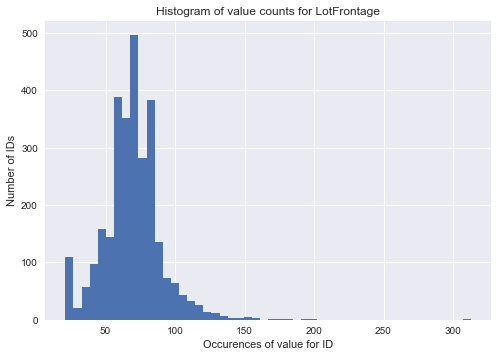

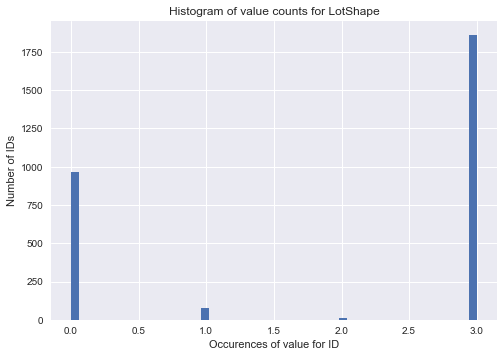

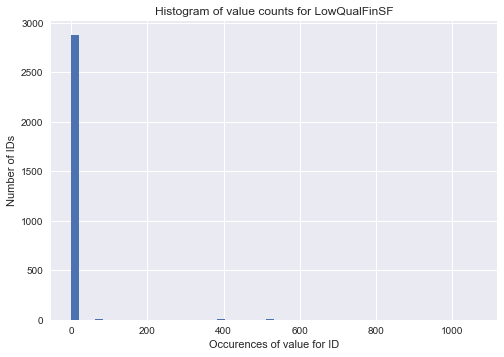

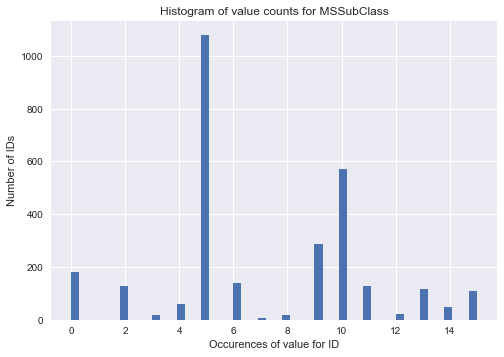

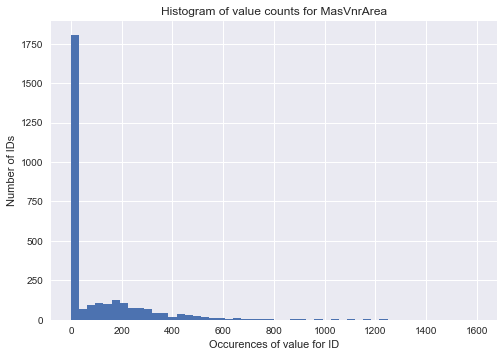

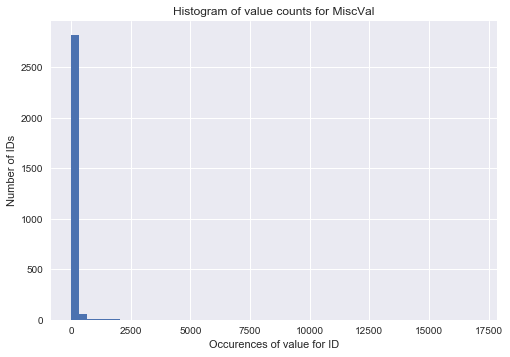

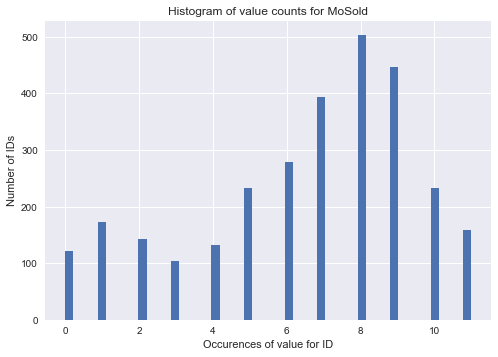

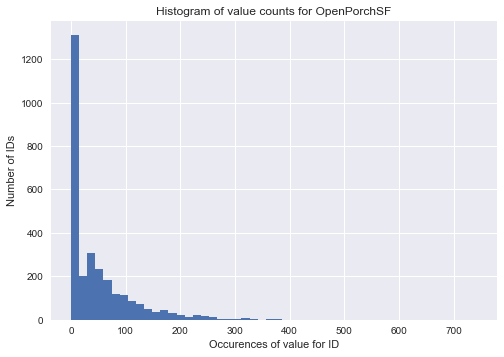

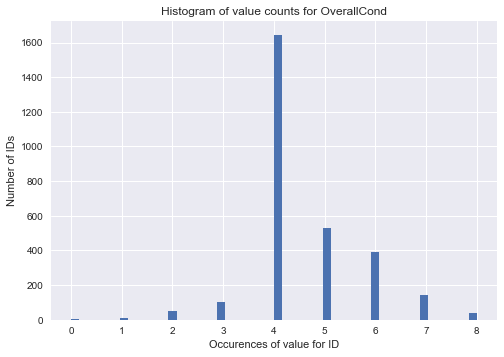

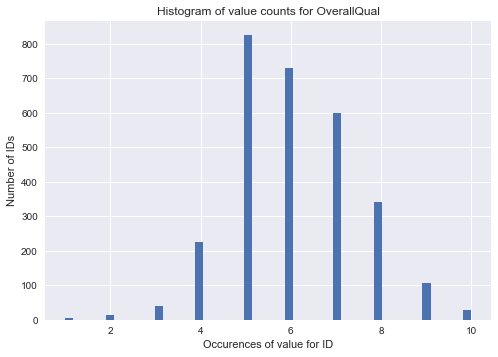

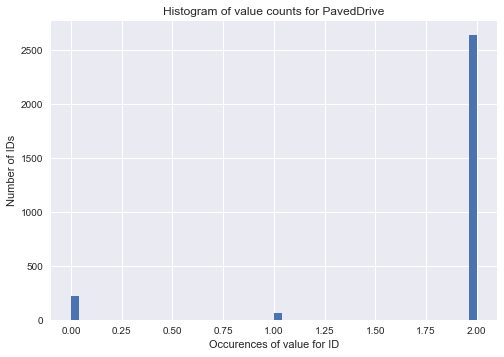

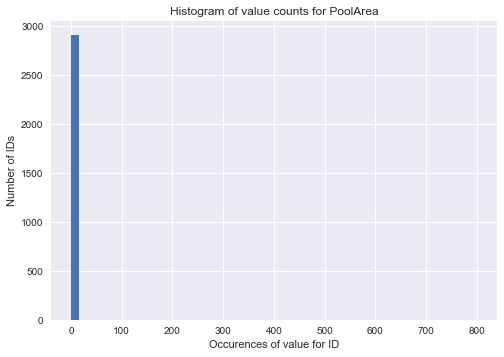

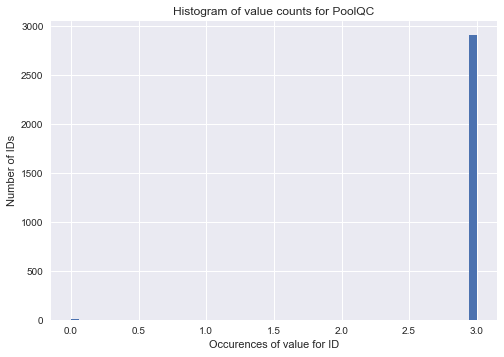

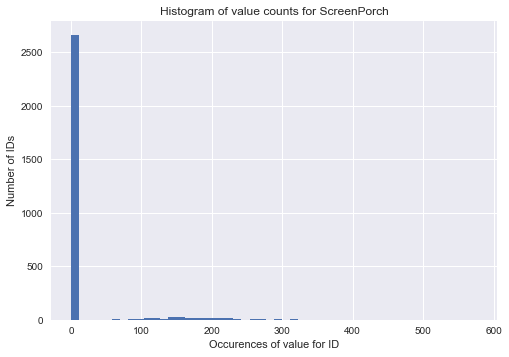

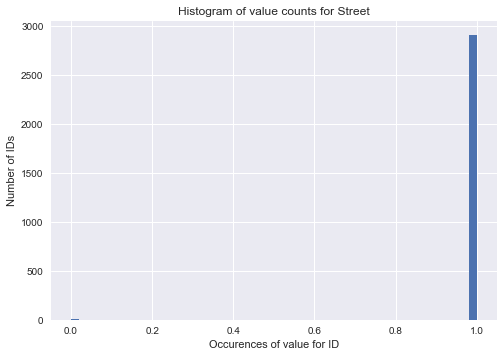

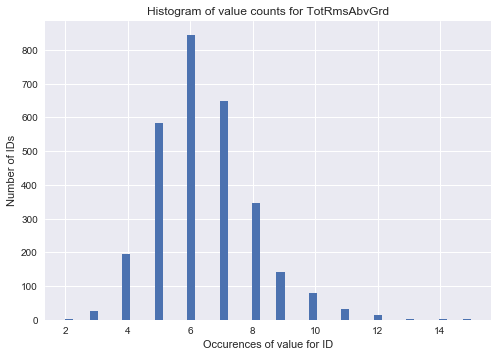

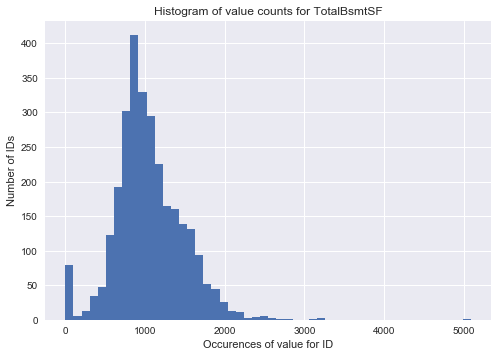

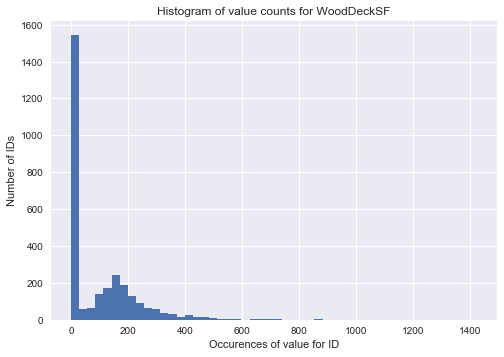

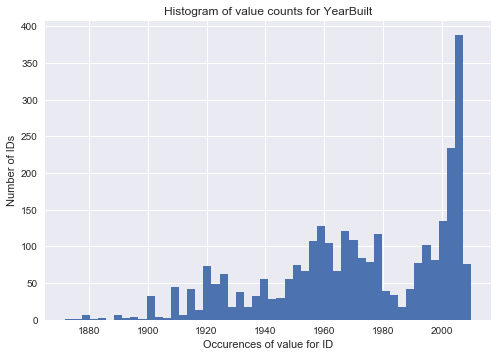

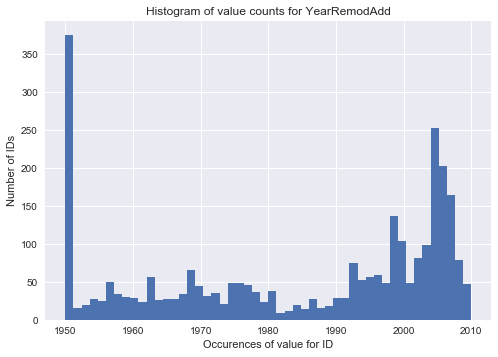

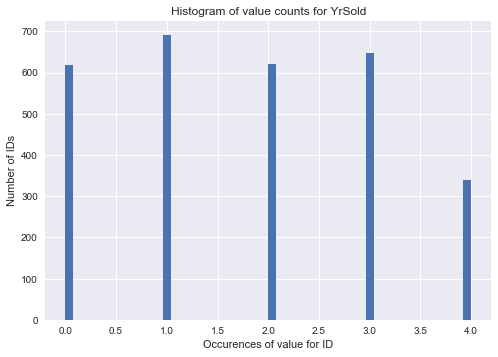

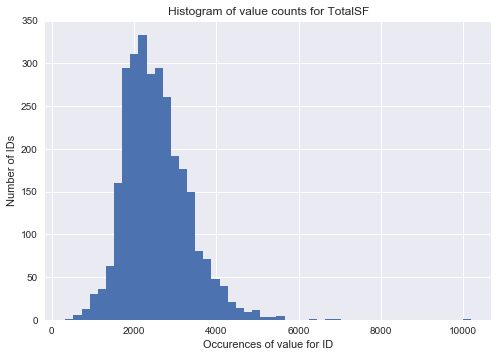

In [35]:
for col in numeric_feats:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(all_data[col], bins=50)
    plt.title("Histogram of value counts for {}".format(col))
    plt.ylabel('Number of IDs')
    plt.xlabel('Occurences of value for ID')
    plt.show()

In [32]:
#Box Cox Transformation of (highly) skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


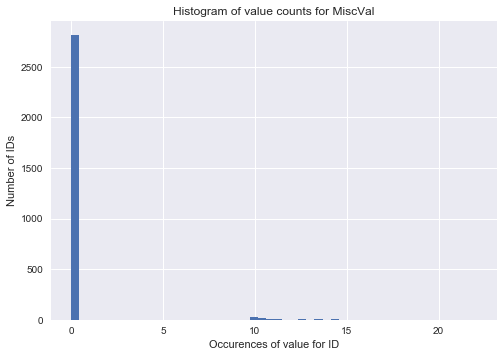

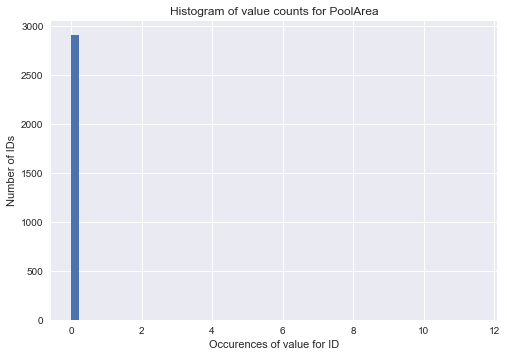

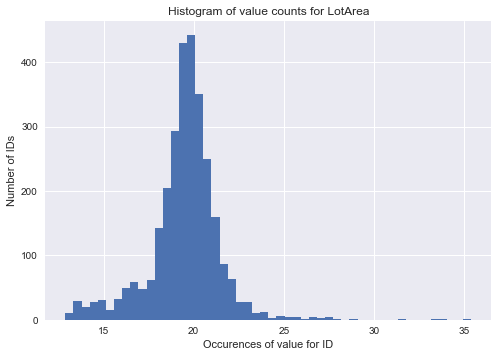

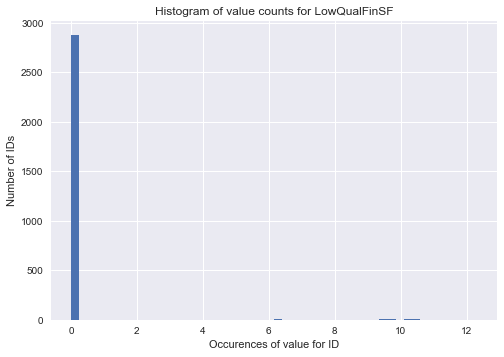

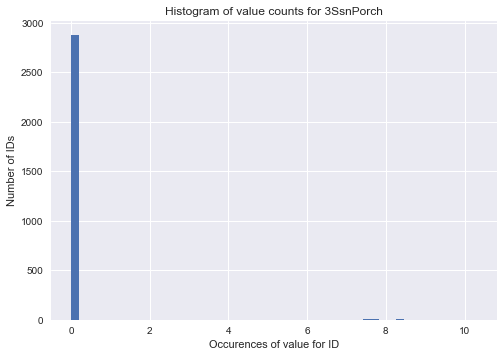

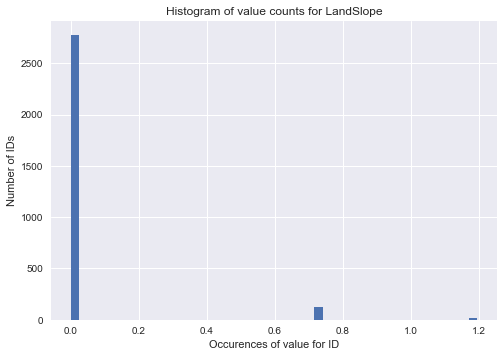

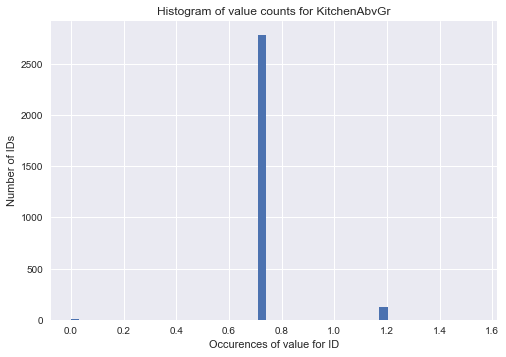

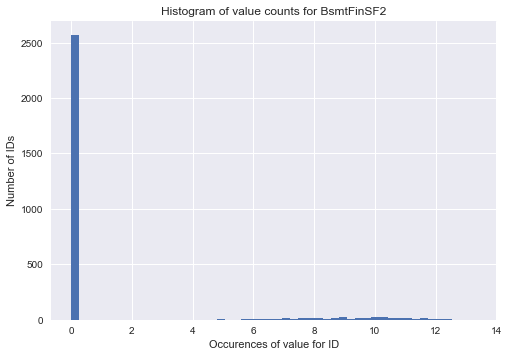

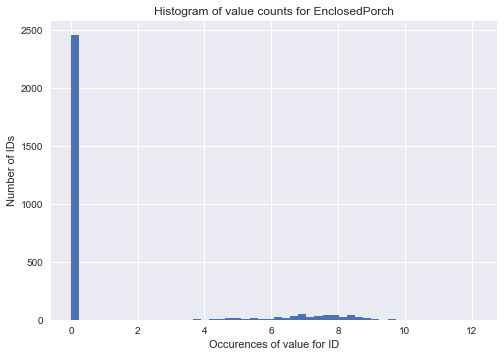

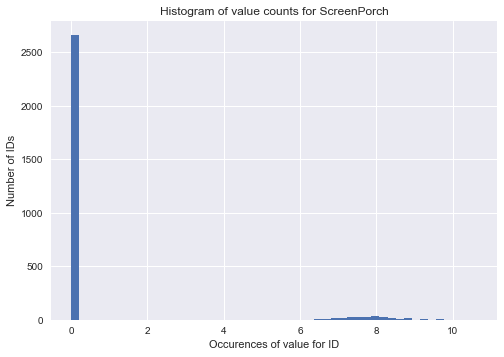

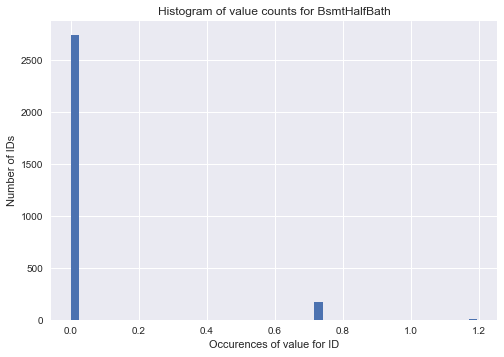

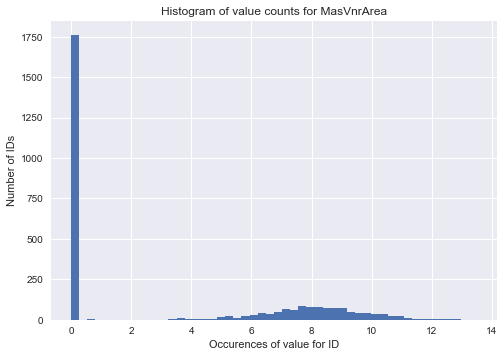

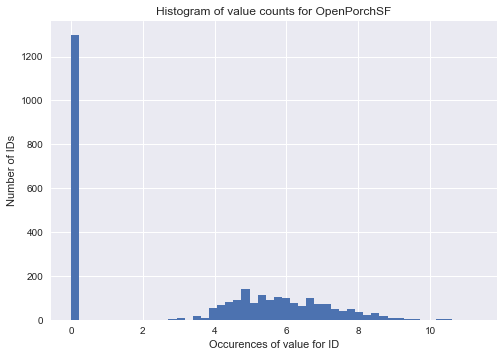

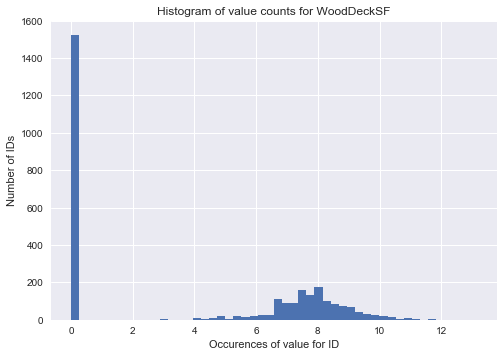

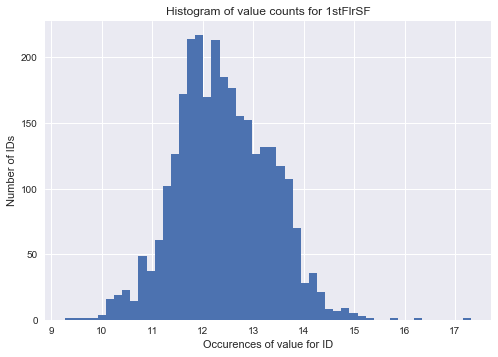

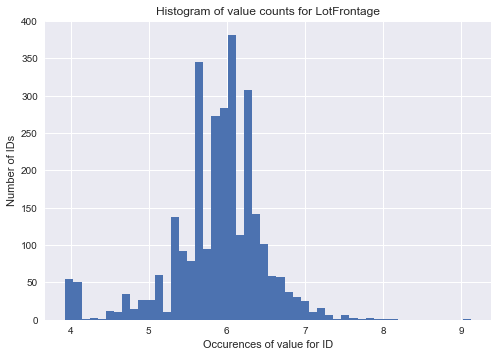

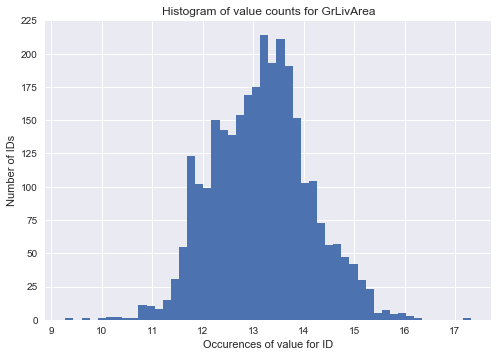

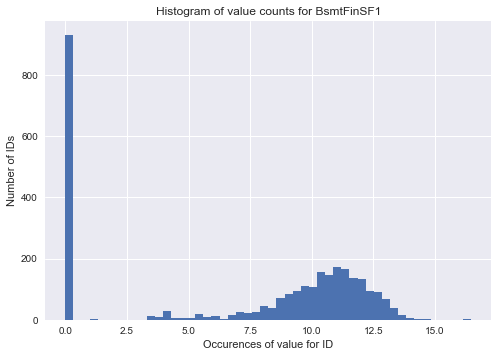

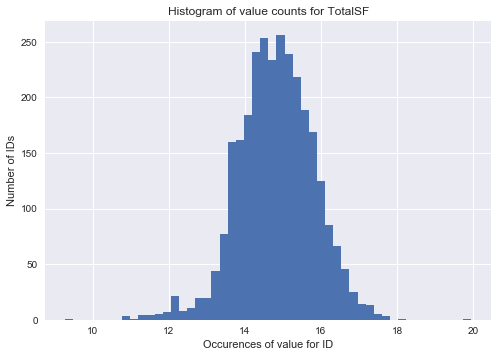

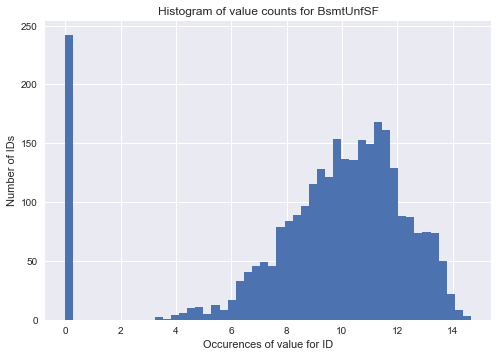

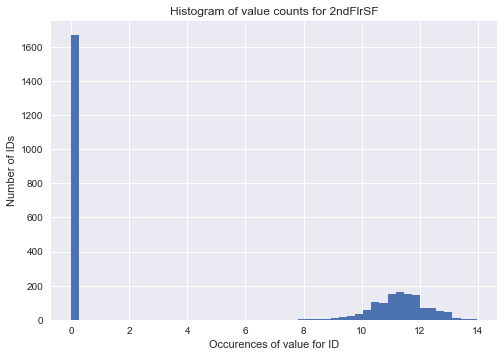

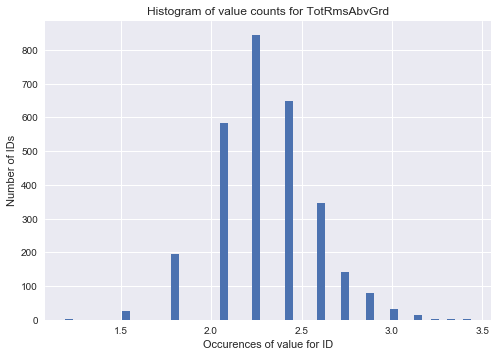

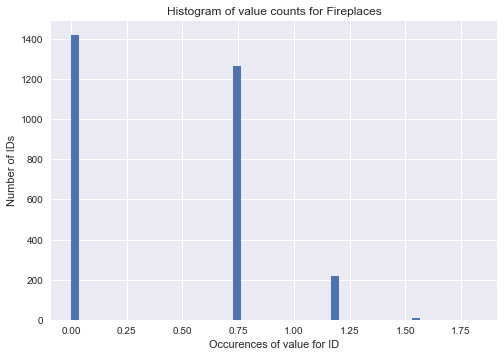

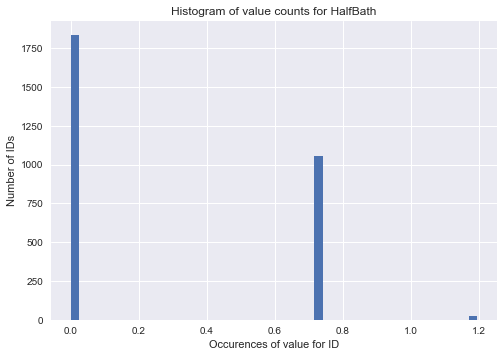

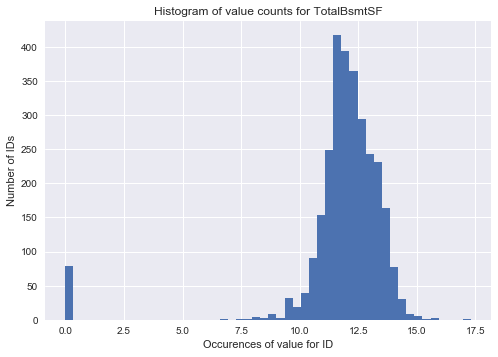

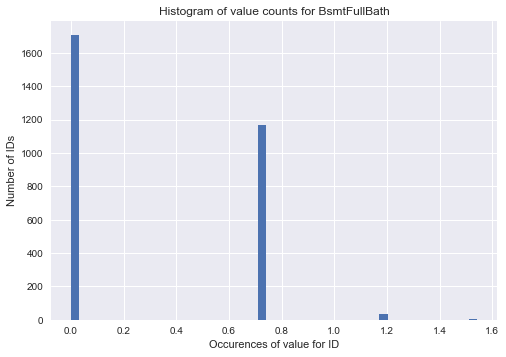

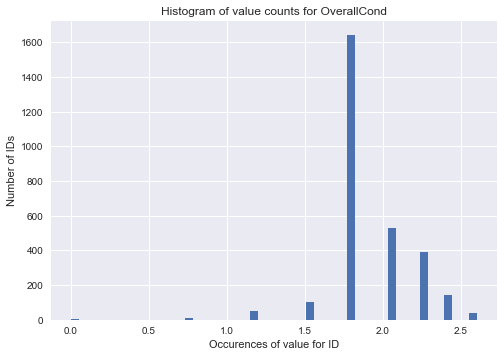

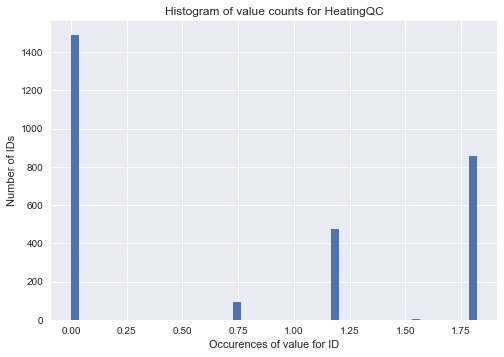

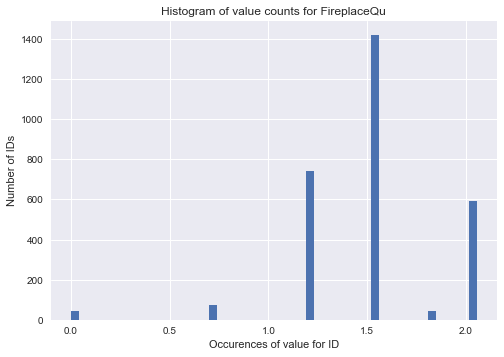

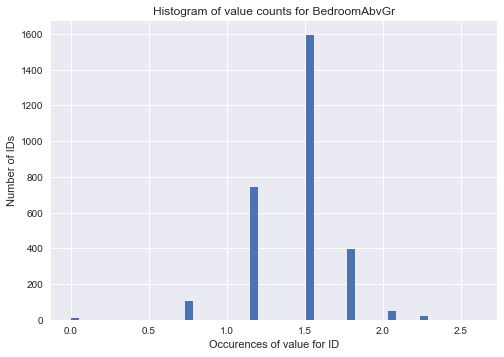

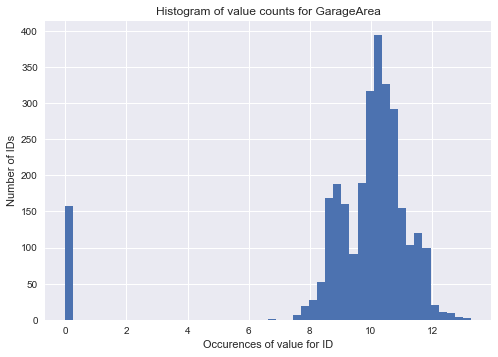

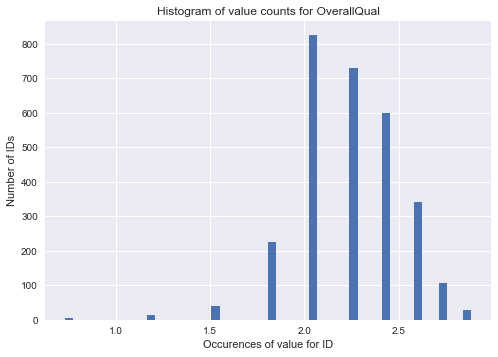

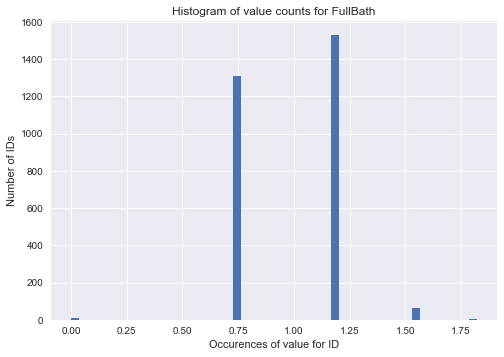

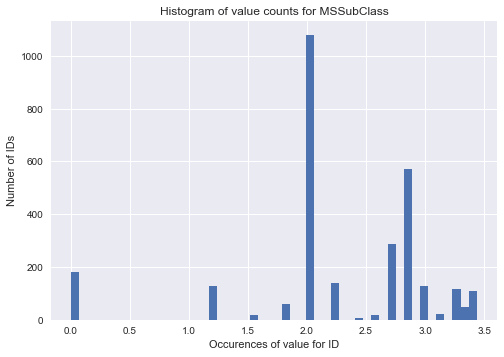

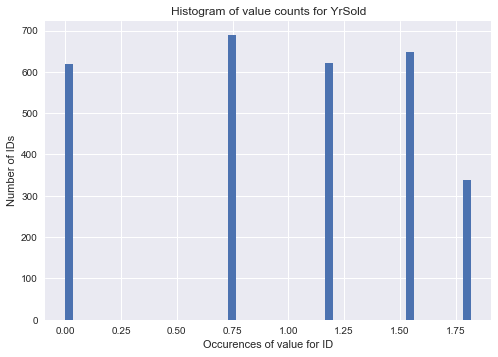

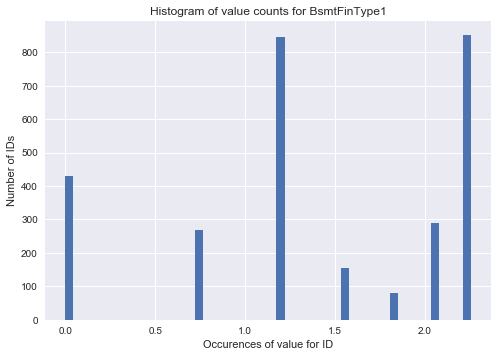

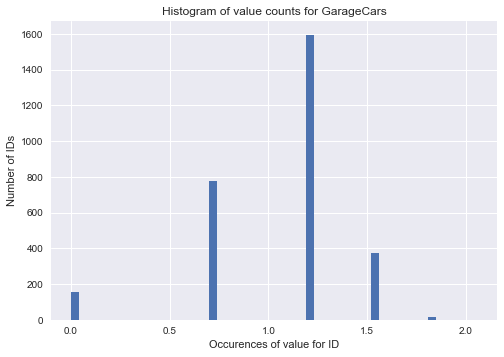

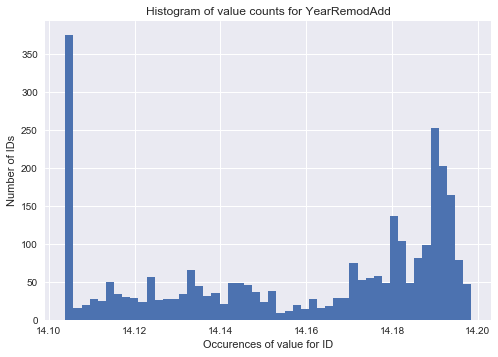

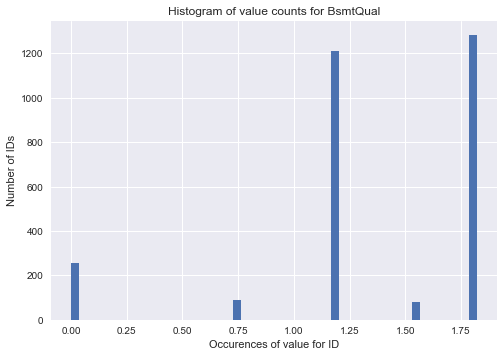

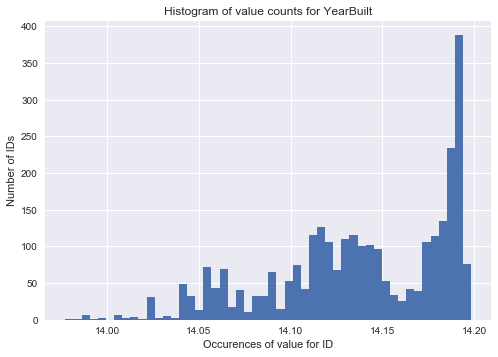

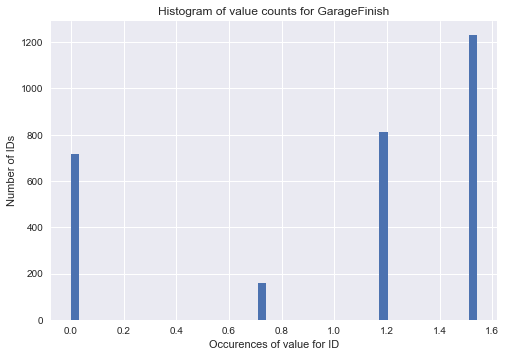

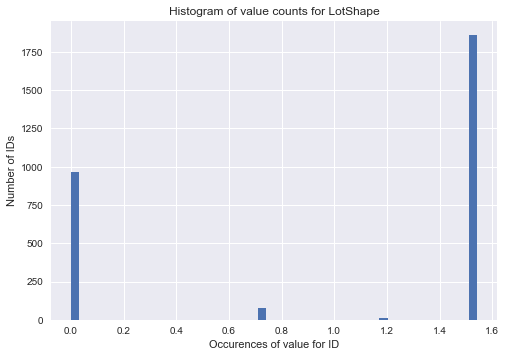

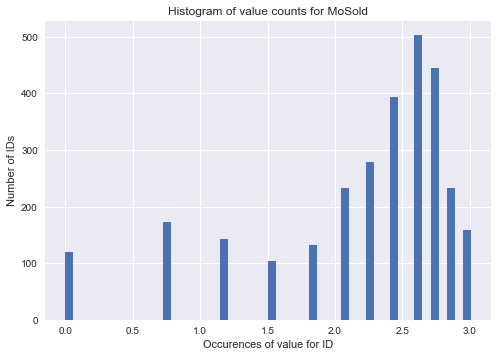

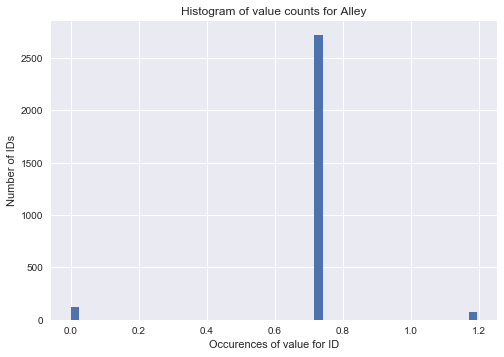

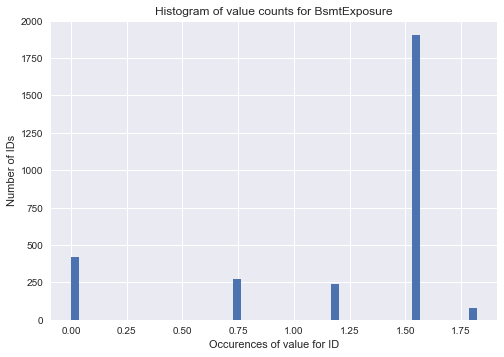

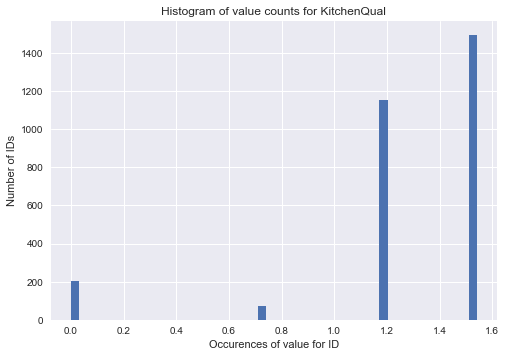

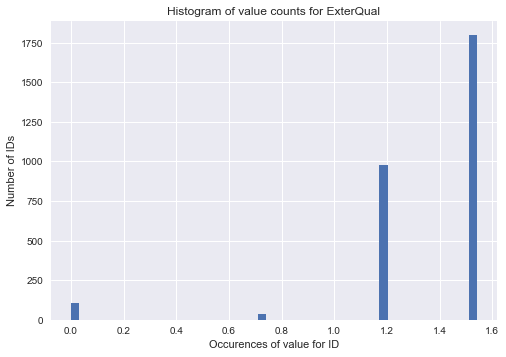

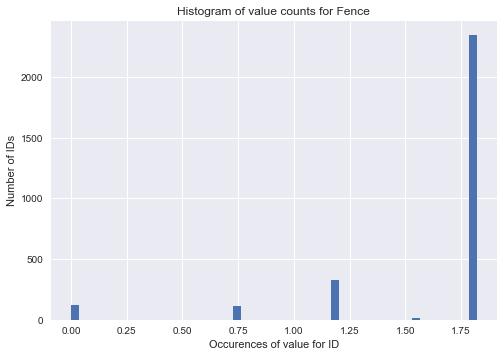

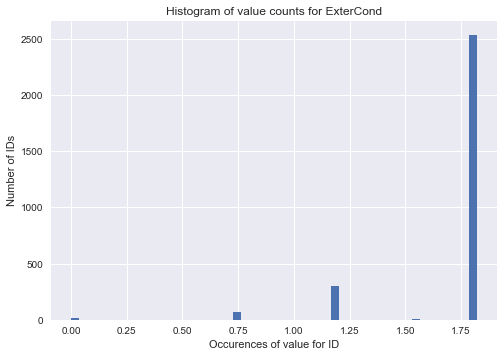

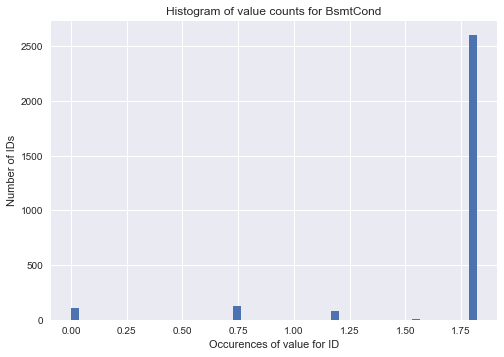

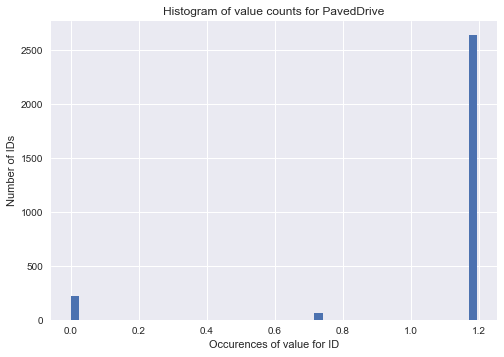

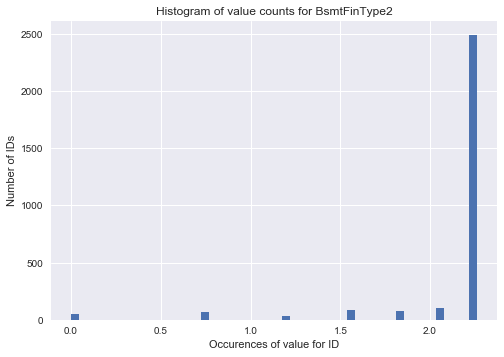

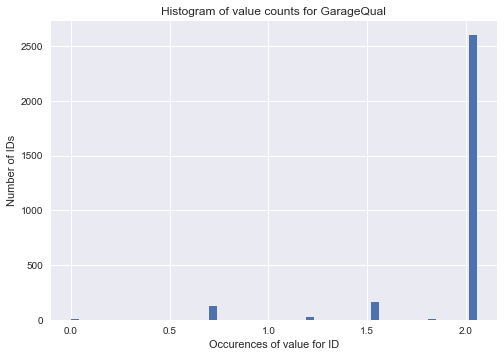

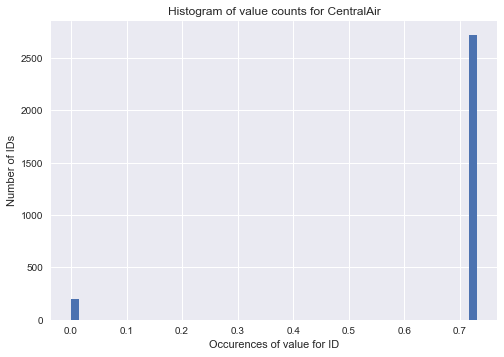

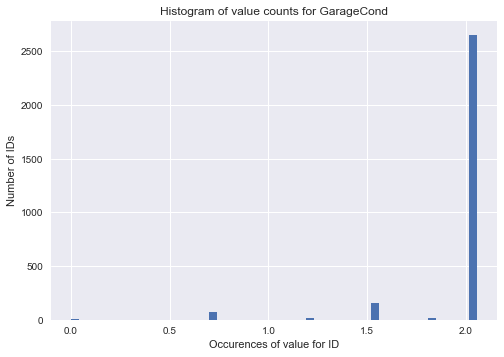

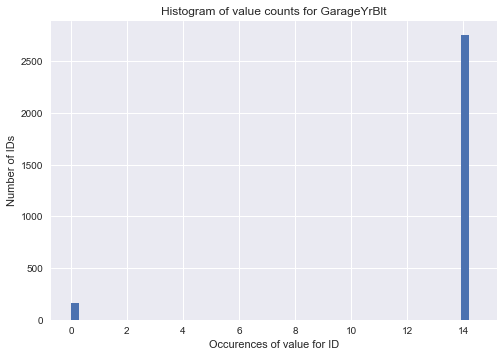

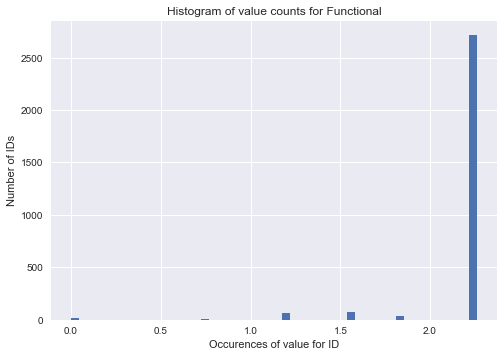

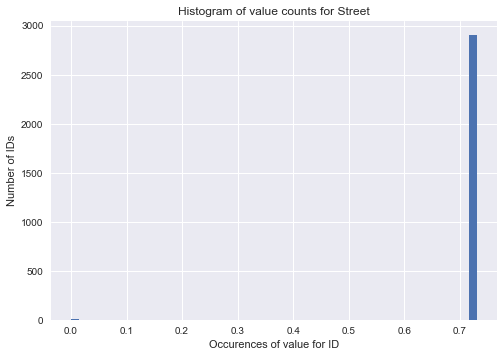

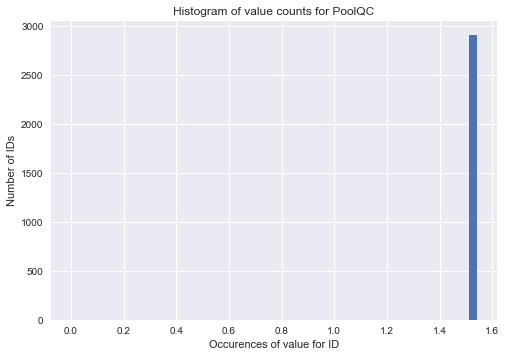

In [38]:
for col in skewed_features:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(all_data[col], bins=50)
    plt.title("Histogram of value counts for {}".format(col))
    plt.ylabel('Number of IDs')
    plt.xlabel('Occurences of value for ID')
    plt.show()

In [33]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [37]:
# correlation after data transformation

In [34]:
train = all_data[:ntrain]
test = all_data[ntrain:]

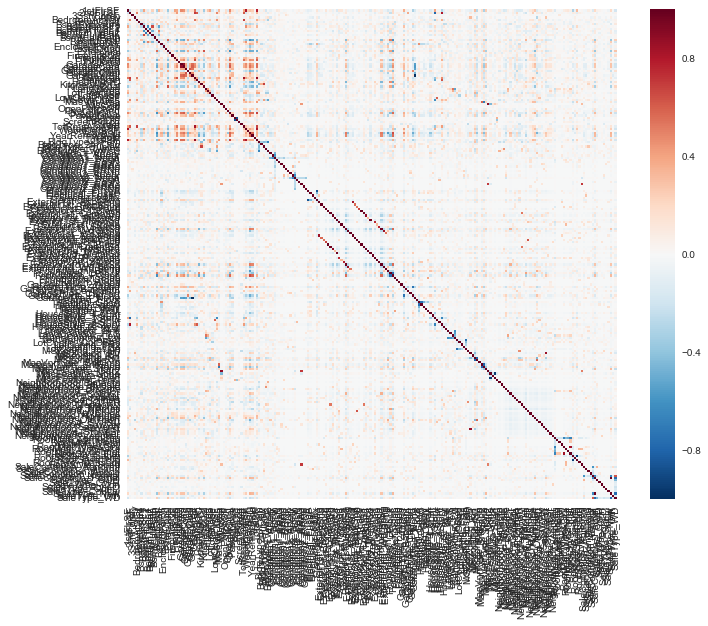

In [39]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
# hard to see, please separate the feature to numeric and categorical, check the correaltion between features and target

In [ ]:
# for ridge/lasso, do we need to do data standardization?
# for example, for lasso, based on prediction?

In [ ]:
# elasticnet (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
# lasso
# kernelridge (http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)
# gbm
# xgboost
# lightgbm (https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html)
# ensemble and stacking

In [ ]:
# tunining parameter
# lasso: alpha 0.001-0.01, 
# ElasticNet: alpha: 0.001-0.01, l1_ratio:1-2
# kernel ridge:alpha: 0.1-0.3, kernel='polynomial', degree:2-4,
# gbm: n_estimators: 2000-3000, learning_rate:0.01-0.1,max_depth:4-6, max_features='sqrt',min_samples_leaf:10-20,
# min_samples_split:10－100,  loss='huber'

In [ ]:
# bayesian, grid serach(lasso,ridge,elasticnet, gbm)
# prediction, submission (score,ranking)

In [89]:
# lasso
from sklearn.linear_model import Lasso
import sklearn.grid_search as gs
from sklearn.metrics import mean_squared_error
lasso = Lasso()
parameter_grid = {'alpha': [0.0001,0.001,0.01,0.1]}


grid_search_lasso = gs.GridSearchCV(lasso,
                           param_grid = parameter_grid,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)

grid_search_lasso.fit(train.values, y_train)
print('Best score (lasso): {}'.format(grid_search_lasso.best_score_))
print('Best parameters: {}'.format(grid_search_lasso.best_params_))

Best score (lasso): -0.0134423581553
Best parameters: {'alpha': 0.001}


In [90]:
y_train_pred_lasso = grid_search_lasso.best_estimator_.predict(train.values)
print("lasso score on training set: ", mean_squared_error( y_train, y_train_pred_lasso)**.5)

('lasso score on training set: ', 0.10738812109654973)


In [191]:
y_test_pred_lasso = grid_search_lasso.best_estimator_.predict(test.values)
sub_df = pd.DataFrame(np.array(test_ID), columns=['ID'])
sub_df['SalePrice'] = np.expm1(y_test_pred_lasso)
sub_df[['ID', 'SalePrice']].to_csv('submission_lasso.csv', index= False)

In [35]:
# gbm
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.grid_search as gs
from sklearn.metrics import mean_squared_error
GBoost = GradientBoostingRegressor(learning_rate=0.1,max_features='sqrt',loss='huber', random_state =5)
parameter_grid = {'n_estimators': [2000,2500,3000,3500], 'max_depth': [3,4,5,6],'min_samples_leaf':[10,11,12,13],
                 'min_samples_split': [9,10,11,12]}
grid_search_GBoost = gs.GridSearchCV(GBoost,
                           param_grid = parameter_grid,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)
grid_search_GBoost.fit(train.values, y_train)
print('Best score (gbm): {}'.format(grid_search_GBoost.best_score_))
print('Best parameters: {}'.format(grid_search_GBoost.best_params_))

Best score (gbm): -0.0141658441682
Best parameters: {'min_samples_split': 9, 'n_estimators': 2000, 'max_depth': 4, 'min_samples_leaf': 13}


In [ ]:
y_test_pred_GBoost= grid_search_GBoost.best_estimator_.predict(test.values)
sub_df = pd.DataFrame(np.array(test_ID), columns=['ID'])
sub_df['SalePrice'] = np.expm1(y_test_pred_GBoost)
sub_df[['ID', 'SalePrice']].to_csv('submission_gbm.csv', index= False)

In [192]:
# kernel ridge
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(kernel='polynomial', coef0=5.0)
parameter_grid = {'alpha': [0.0001,0.001,0.01,0.1, 0.2], 'degree': [2,3,4]}


grid_search_KRR = gs.GridSearchCV(KRR,
                           param_grid = parameter_grid,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)

grid_search_KRR.fit(train.values, y_train)
print('Best score (KRR): {}'.format(grid_search_KRR.best_score_))
print('Best parameters: {}'.format(grid_search_KRR.best_params_))

y_train_pred_KRR = grid_search_KRR.best_estimator_.predict(train.values)
print("KRR score on training set: ", mean_squared_error( y_train, y_train_pred_KRR)**.5)

y_test_pred_KRR = grid_search_KRR.best_estimator_.predict(test.values)
sub_df = pd.DataFrame(np.array(test_ID), columns=['ID'])
sub_df['SalePrice'] = np.expm1(y_test_pred_KRR)
sub_df[['ID', 'SalePrice']].to_csv('submission_KRR.csv', index= False)

Best score (KRR): -0.0142637151298
Best parameters: {'alpha': 0.2, 'degree': 2}
('KRR score on training set: ', 0.074212755997406912)


In [193]:
# elasticnet
from sklearn.linear_model import ElasticNet
ENet = ElasticNet()
parameter_grid = {'alpha': [0.0001,0.001, 0.002,0.01,0.1, 0.2], 'l1_ratio': [0.1,0.3,0.5,0.7, 0.9,1.0]}

grid_search_ENet = gs.GridSearchCV(ENet,
                           param_grid = parameter_grid,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)

grid_search_ENet.fit(train.values, y_train)
print('Best score (ENet): {}'.format(grid_search_ENet.best_score_))
print('Best parameters: {}'.format(grid_search_ENet.best_params_))

y_train_pred_ENet = grid_search_ENet.best_estimator_.predict(train.values)
print("ENet score on training set: ", mean_squared_error( y_train, y_train_pred_ENet)**.5)

y_test_pred_ENet = grid_search_ENet.best_estimator_.predict(test.values)
sub_df = pd.DataFrame(np.array(test_ID), columns=['ID'])
sub_df['SalePrice'] = np.expm1(y_test_pred_ENet)
sub_df[['ID', 'SalePrice']].to_csv('submission_ENet.csv', index= False)

Best score (ENet): -0.012953412375
Best parameters: {'alpha': 0.001, 'l1_ratio': 0.5}
('ENet score on training set: ', 0.10328645912511643)


In [163]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import gc
from bayes_opt import BayesianOptimization

In [164]:
# lightgbm
X_train=train.values
y_train=y_train
X_test=test.values

In [165]:
def bayes_parameter_opt_lgb(X, y, init_round=2, opt_round=8, n_folds=5, random_seed=6, output_process=True):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y,free_raw_data=False)
    # parameters
    def lgb_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_lambda, reg_alpha, min_split_gain, min_child_weight, 
                min_child_sample, max_bin, subsample_freq,learning_rate):
        params = {'objective':'regression','boosting_type': 'gbdt','nthread': 4, 'verbose': -1,\
                'learning_rate':learning_rate, \
                  'early_stopping_round':50}
        params['subsample_freq']=int(round(subsample_freq))
        params['min_child_sample']=int(round(min_child_sample))
        params['max_bin']=int(round(max_bin))
        params["num_leaves"] = int(round(num_leaves))
        params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
        params['subsample'] = max(min(subsample, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['reg_lambda'] = max(reg_lambda, 0)
        params['reg_alpha'] = max(reg_alpha, 0)
        params['learning_rate'] = learning_rate
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, train_data, nfold=5, num_boost_round=3000,seed=random_seed, stratified=False, verbose_eval=10, metrics=['rmse'])
        return -1.0 * np.mean(cv_result['rmse-mean'])
    # range 
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (5, 50),
                                            'learning_rate':(0.01, 0.1),
                                            'colsample_bytree': (0.1, 1.0),
                                            'subsample': (0.6, 1.0),
                                            'max_depth': (3, 8),
                                            'reg_lambda': (0.0, 1.0),
                                            'reg_alpha': (0.0, 1.0),
                                            'min_child_sample':(6,20),
                                            'max_bin':(30,100),
                                            'subsample_freq':(1,10),
                                            'min_split_gain': (0.1, 0.8),
                                            'min_child_weight': (3.0, 20.0)})
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=2, opt_round=8, n_folds=5, random_seed=6, output_process=True)

Initialization
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |   learning_rate |   max_bin |   max_depth |   min_child_sample |   min_child_weight |   min_split_gain |   num_leaves |   reg_alpha |   reg_lambda |   subsample |   subsample_freq | 
[10]	cv_agg's rmse: 0.257259 + 0.0143699
[20]	cv_agg's rmse: 0.189019 + 0.00941624
[30]	cv_agg's rmse: 0.160703 + 0.00701939
[40]	cv_agg's rmse: 0.147563 + 0.00547808
[50]	cv_agg's rmse: 0.141496 + 0.00474891
[60]	cv_agg's rmse: 0.139048 + 0.00470601
[70]	cv_agg's rmse: 0.138433 + 0.00459409
[80]	cv_agg's rmse: 0.138425 + 0.00459787
[90]	cv_agg's rmse: 0.138425 + 0.00459787
[100]	cv_agg's rmse: 0.138425 + 0.00459787
[110]	cv_agg's rmse: 0.138425 + 0.00459787
[120]	cv_agg's rmse: 0.138425 + 0.00459787
    1 | 00m0

In [180]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [181]:
train.shape

(1458, 220)

In [182]:
test.shape

(1459, 220)

In [183]:
train_org = pd.read_csv('train.csv')

In [184]:
train_org = train_org.drop(train_org[(train_org['GrLivArea']>4000) & (train_org['SalePrice']<300000)].index)

In [185]:
train_org.shape

(1458, 81)

In [186]:
train_org["SalePrice"] = np.log1p(train_org["SalePrice"])

In [187]:
y_train=train_org["SalePrice"]

In [198]:
folds = KFold(n_splits=5, shuffle=True, random_state=1001)
# Create arrays and dataframes to store results
oof_preds = np.zeros(train.shape[0])
sub_preds = np.zeros(test.shape[0])
feature_importance_df = pd.DataFrame()
    
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train, y_train)):
    dtrain = lgb.Dataset(data=train.iloc[train_idx], 
                         label=y_train.iloc[train_idx],
                         free_raw_data=False)
    dvalid = lgb.Dataset(data=train.iloc[valid_idx],
                         label=y_train.iloc[valid_idx],
                         free_raw_data=False)
    params = {'boosting_type': 'gbdt',
              'objective': 'regression',
              'metric':'rmse',
              'learning_rate': 0.0869,
              'num_leaves':40, 
              'max_depth': 3,  
              'min_child_samples': 19,  
              'max_bin': 31,  
              'subsample': 0.7771,  
              'subsample_freq': 9,  
              'colsample_bytree':0.8971,  
              'min_split_gain': 0.2045,
              'min_child_weight': 9.5688 ,
              'reg_lambda': 0.9107,
              'reg_alpha': 0.2266,
              'nthread': 8,
              'verbose': -1,}
    
    clf = lgb.train(params, 
                    dtrain, 
                    valid_sets=[dtrain, dvalid], 
                    valid_names=['train','valid'],
                    num_boost_round=3000,
                    early_stopping_rounds=50,
                    verbose_eval=10)

    oof_preds[valid_idx] = clf.predict(train.iloc[valid_idx])
    sub_preds += clf.predict(test) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train.columns
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d rmse : %.6f' % (n_fold + 1,mean_squared_error(y_train.iloc[valid_idx], oof_preds[valid_idx]) ** .5)) 
    del clf, dtrain, dvalid
    gc.collect()

print('Full rmse %.6f' % mean_squared_error(y_train, oof_preds)**.5)
# Write submission file and plot feature importance
sub_df = pd.DataFrame(np.array(test_ID), columns=['ID'])
sub_df['SalePrice'] =np.expm1(sub_preds)
sub_df[['ID', 'SalePrice']].to_csv('submission_lgb_bayesian.csv', index= False)

Training until validation scores don't improve for 50 rounds.
[10]	train's rmse: 0.228249	valid's rmse: 0.240902
[20]	train's rmse: 0.162726	valid's rmse: 0.17792
[30]	train's rmse: 0.133566	valid's rmse: 0.155077
[40]	train's rmse: 0.121315	valid's rmse: 0.144059
[50]	train's rmse: 0.116186	valid's rmse: 0.139189
[60]	train's rmse: 0.113061	valid's rmse: 0.1363
[70]	train's rmse: 0.113061	valid's rmse: 0.1363
[80]	train's rmse: 0.113061	valid's rmse: 0.1363
[90]	train's rmse: 0.113061	valid's rmse: 0.1363
[100]	train's rmse: 0.113061	valid's rmse: 0.1363
[110]	train's rmse: 0.113061	valid's rmse: 0.1363
Early stopping, best iteration is:
[60]	train's rmse: 0.113061	valid's rmse: 0.1363
Fold  1 rmse : 0.136300
Training until validation scores don't improve for 50 rounds.
[10]	train's rmse: 0.22823	valid's rmse: 0.239763
[20]	train's rmse: 0.160632	valid's rmse: 0.180729
[30]	train's rmse: 0.132367	valid's rmse: 0.156687
[40]	train's rmse: 0.119917	valid's rmse: 0.147146
[50]	train's rm

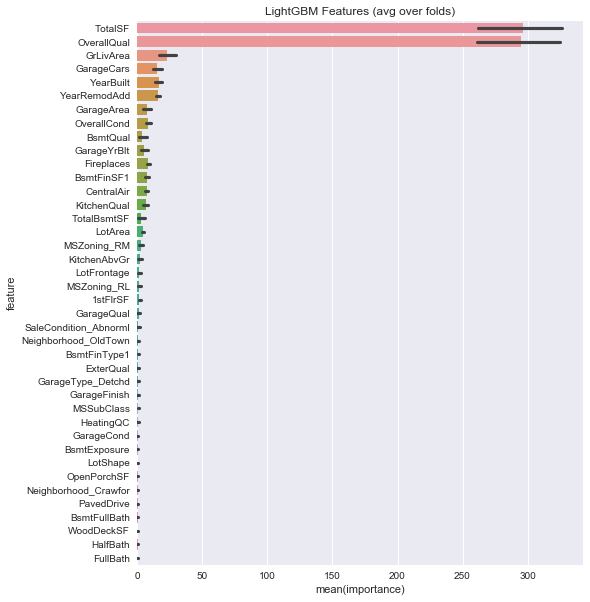

In [202]:
# feature importance
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(8, 10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout
plt.show()

In [203]:
import gc
import time
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [204]:
def xgb_evaluate(max_depth, subsample,gamma, colsample_bytree, max_leaves,max_bin, min_child_weight,colsample_bylevel,\
                reg_alpha,reg_lambda,eta,n_estimators ):
    params = {'eval_metric': 'rmse',\
              'objective': 'reg:linear',\
              'booster':'gbtree',\
              'max_depth': int(max_depth),\
              'n_estimators':int(n_estimators),
              'subsample': subsample,\
              'eta': eta,\
              'gamma': gamma,\
              'colsample_bytree': colsample_bytree,\
             'max_leaves': int(max_leaves),\
              'max_bin':int(max_bin),\
              'min_child_weight':min_child_weight,\
              'colsample_bylevel':colsample_bylevel,\
              'reg_alpha':reg_alpha,\
              'reg_lambda':reg_lambda}
    cv_result = xgb.cv(params, dtrain, nfold=5)    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [205]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 8), \
                                             'eta':(0.01, 0.1),\
                                             'gamma': (0, 1),\
                                             'subsample': (0.5, 1.0),\
                                            'max_leaves': (10, 100),\
                                             'n_estimators':(2000,3000),\
                                            'colsample_bytree': (0.4, 1.0),\
                                            'reg_lambda': (0, 1),\
                                            'reg_alpha': (0, 1),\
                                            'max_bin':(30,100),\
                                            'colsample_bylevel':(0.6,1.0),\
                                            'min_child_weight': (1, 10)})
# Use the expected improvement acquisition function to handle negative numbers
xgb_bo.maximize(init_points=3, n_iter=7, acq='ei')

Initialization
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bylevel |   colsample_bytree |       eta |     gamma |   max_bin |   max_depth |   max_leaves |   min_child_weight |   n_estimators |   reg_alpha |   reg_lambda |   subsample | 
    1 | 00m00s |   -9.72334 |              0.6965 |             0.9178 |    0.0169 |    0.9590 |   78.7586 |      4.5635 |      70.6153 |             4.8103 |      2612.9951 |      0.7010 |       0.3807 |      0.6756 | 
    2 | 00m01s |   -8.74465 |              0.8698 |             0.5243 |    0.0273 |    0.1456 |   54.9240 |      4.7796 |      49.6354 |             4.2784 |      2091.5331 |      0.7201 |       0.0629 |      0.9922 | 
    3 | 00m00s |   -9.40560 |              0.7598 |             0.5493 |    0.0202 |    0.2032 |   93.6335

In [206]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train_org = pd.read_csv('train.csv')
train_org = train_org.drop(train_org[(train_org['GrLivArea']>4000) & (train_org['SalePrice']<300000)].index)
train_org["SalePrice"] = np.log1p(train_org["SalePrice"])
y_train=train_org["SalePrice"]

In [207]:
folds = KFold(n_splits= 5, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
oof_preds = np.zeros(train.shape[0])
sub_preds = np.zeros(test.shape[0])
feature_importance_df = pd.DataFrame()
dtest=xgb.DMatrix(test)
    
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train, y_train)):
    dtrain = xgb.DMatrix(train.iloc[train_idx],y_train.iloc[train_idx])
    dvalid = xgb.DMatrix(train.iloc[valid_idx], y_train.iloc[valid_idx])
    valid_y=y_train.iloc[valid_idx]

       # xgb
    params = {'eval_metric': 'rmse',
              'objective': 'reg:linear',
              'booster':'gbtree',
              #'tree_method': 'auto',
              'nthread' : 4,
              'eta' : 0.0554,
              'max_leaves': 97,
              'max_depth' : 5,
              'max_bin': 72,
              'min_child_weight' : 5.4760,
              'subsample' :0.6062,
              'colsample_bytree' :0.6365,
              'colsample_bylevel' : 0.6574,
              'reg_alpha' : 0.4690,
              'reg_lambda' : 0.9256,
              'gamma':0.5157}
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
        
    model=xgb.train(params, dtrain, 2400, watchlist, maximize=False, early_stopping_rounds = 50, verbose_eval=10)
    oof_preds[valid_idx] = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
    sub_preds += model.predict(dtest,ntree_limit=model.best_ntree_limit) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df = pd.DataFrame(model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d rmse : %.6f' % (n_fold + 1,mean_squared_error(valid_y, oof_preds[valid_idx]) ** .5)) 
    del model, dtrain, dvalid
    gc.collect()

print('Full rmse %.6f' % mean_squared_error(y_train, oof_preds)**.5)
sub_df = pd.DataFrame(np.array(test_ID), columns=['ID'])
sub_df['SalePrice'] = np.expm1(sub_preds)
sub_df[['ID', 'SalePrice']].to_csv('submission_xgb_bayesian.csv', index= False)

[0]	train-rmse:10.8925	valid-rmse:10.8959
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:6.17111	valid-rmse:6.17624
[20]	train-rmse:3.50519	valid-rmse:3.50987
[30]	train-rmse:1.99689	valid-rmse:2.00268
[40]	train-rmse:1.14356	valid-rmse:1.14519
[50]	train-rmse:0.664776	valid-rmse:0.664617
[60]	train-rmse:0.398063	valid-rmse:0.397829
[70]	train-rmse:0.255505	valid-rmse:0.258819
[80]	train-rmse:0.184161	valid-rmse:0.190566
[90]	train-rmse:0.151896	valid-rmse:0.161541
[100]	train-rmse:0.138322	valid-rmse:0.149843
[110]	train-rmse:0.133473	valid-rmse:0.145764
[120]	train-rmse:0.131013	valid-rmse:0.143296
[130]	train-rmse:0.130117	valid-rmse:0.142749
[140]	train-rmse:0.129524	valid-rmse:0.142043
[150]	train-rmse:0.129001	valid-rmse:0.141658
[160]	train-rmse:0.128768	valid-rmse:0.141522
[170]	train-rmse:0.128546	valid-rmse:0.141392
[180]	train-rmse:0.128545	valid-rmse:0.141411
[1

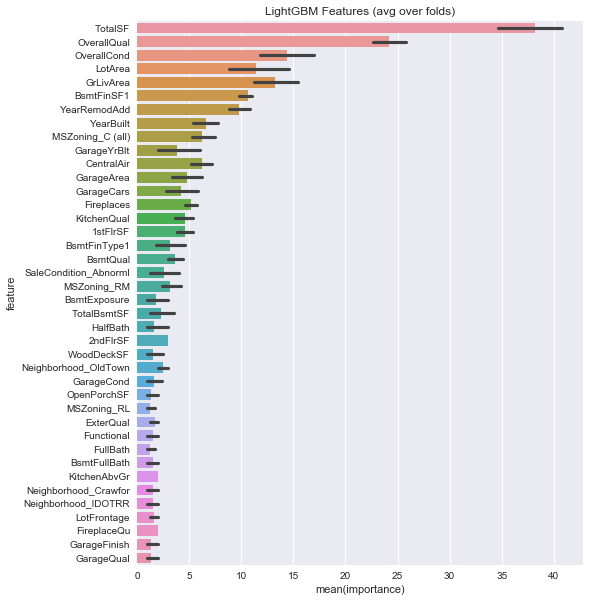

In [208]:
# feature importance
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(8, 10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout
plt.show()